# Generation of IPython Notebooks

Casey Hartnett

 - M.S. Mathematical Statistics

 - Statistical Analyst II at Cvent

 - caseyhartnett@gmail.com

 - https://github.com/caseyhartnett/callisto_morns_generate_ipynb

# What is an IPython Noteboook?

In [30]:
with open('hotel_report.ipynb', 'r') as notebook:
    data = notebook.read()

print(data[0:300])

{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 14,
   "metadata": {},
   "outputs": [],
   "source": [
    "# import needed libraries \n",
    "import matplotlib\n",
    "import matplotlib.pyplot as plt\n",
    "import numpy as np\n",
    "import pandas as pd\n",
    "import seaborn


### A .ipynb file is a dictionary saved as a json

### The ipynb structure

To show that a ipynb is a dictionary, let us read the example file into session.

In [2]:
import json
with open('starting_hotel_report.ipynb') as json_data:
    data = json.load(json_data)
print(type(data))

<class 'dict'>


### ipynb is a dictionary

A dictionary with only 4 keys. Furthermore, two are just intgers.

In [3]:
data.keys()

dict_keys(['metadata', 'cells', 'nbformat', 'nbformat_minor'])

In [4]:
data['nbformat']

4

In [5]:
data['nbformat_minor']

2

### Metadata

Metadata contains just basic information about the session. This can also be customized by adding extra information like authors.

In [6]:
data['metadata']

{'kernelspec': {'display_name': 'Python 3',
  'language': 'python',
  'name': 'python3'},
 'language_info': {'codemirror_mode': {'name': 'ipython', 'version': 3},
  'file_extension': '.py',
  'mimetype': 'text/x-python',
  'name': 'python',
  'nbconvert_exporter': 'python',
  'pygments_lexer': 'ipython3',
  'version': '3.5.1'}}

### Cells

A few different types exist but they all follow the same general form

In [7]:
{
  "cell_type" : "name",
  "metadata" : {},
  "source" : "single string or [list, of, strings]",
}

{'cell_type': 'name',
 'metadata': {},
 'source': 'single string or [list, of, strings]'}

#### Markdown Cell

Below is the general format

In [8]:
{
  "cell_type" : "markdown",
  "metadata" : {},
  "source" : ["some *markdown*"],
}

{'cell_type': 'markdown', 'metadata': {}, 'source': ['some *markdown*']}

### Code Cell

This is the bulk of the ipynb file. All of the code and output is stored in this type of cell.

In [9]:
data['cells'][0]

{'cell_type': 'code',
 'execution_count': 14,
 'metadata': {},
 'outputs': [],
 'source': ['# import needed libraries \n',
  'import matplotlib\n',
  'import matplotlib.pyplot as plt\n',
  'import numpy as np\n',
  'import pandas as pd\n',
  'import seaborn as sns\n',
  '%matplotlib inline']}

### Code Cell

Below is an example of when an output is a picture

In [10]:
data['cells'][8]

{'cell_type': 'code',
 'execution_count': 72,
 'metadata': {},
 'outputs': [{'data': {'text/plain': ["Text(0,0.5,'Room Count')"]},
   'execution_count': 72,
   'metadata': {},
   'output_type': 'execute_result'},
  {'data': {'image/png': 'iVBORw0KGgoAAAANSUhEUgAAAY4AAAEWCAYAAABxMXBSAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo\ndHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzt3XmcXGWd7/HPNwvJsCWkaZZOAiEk\nVy8ygpgBXAeDE5bLNdy5yNKooCgzjDI4V4KAjjBzUZTgOIzOzVxGEFDCoqMDFxCCRMQZBQ2oEDYJ\nLdkaSNMJCVuWJr/7x3kaKp3urqruU1VdVd/361WvrnPqqed56nR3/c6znOcoIjAzMyvVqFpXwMzM\n6osDh5mZlcWBw8zMyuLAYWZmZXHgMDOzsjhwmJlZWRw4rKIkXSPpkiqV9T8krZT0sqR3VKPMRidp\nmqSQNKbWdRmqav4NNgsHjiYh6RlJr6Uv1XWSbpc0tdb1KpS+oGYMI4vLgc9ExM4R8ZsB8n8lHYPV\nkv5B0uhhlJcbSYdKukPSi5LWSvqVpI9Xodx7JX2y0uWksi5Ov4Nz+uw/J+2/OIcyTpf0H8PNxwbn\nwNFc/ntE7AzsDTwPfLPG9cnbvsCjRdIclI7BnwInAZ+oeK2KkPQuYDHwM2AG0AKcBRxTy3pVyO+B\nj/XZd1rab3XCgaMJRcRG4AfAAb37JE2QdJ2kLknLJX1R0qj02gJJ/1aQ9mu

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# collect data
df = pd.read_csv('callisto_example_data.csv')

## Basic Plots

We start with a basic histogram for one of the hotels in the provided data set.

Text(0,0.5,'Count')

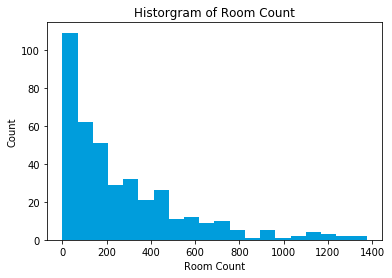

In [12]:
plt.hist(df[df.hotel == 'hotel_a'].room_night_count, bins=20, color='#009ddc')
plt.title('Historgram of Room Count')
plt.xlabel('Room Count')
plt.ylabel('Count')

## Multiple Plots

What if we want to do this for multiple hotels?

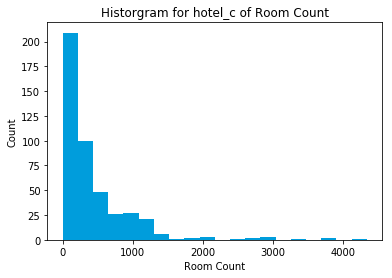

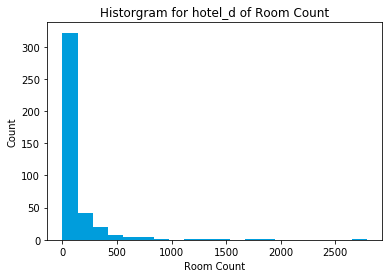

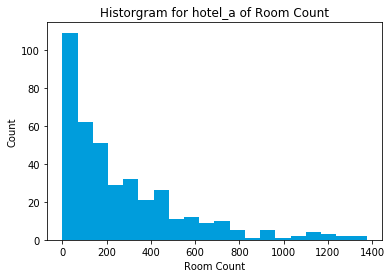

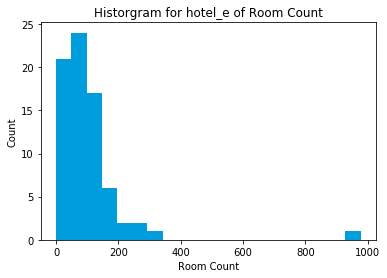

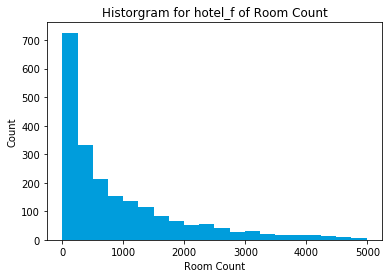

In [13]:
for hotel in df.hotel.unique():
    plt.hist(df[df.hotel == hotel].room_night_count, bins=20, color='#009ddc')
    plt.title('Historgram for %s of Room Count' % hotel)
    plt.xlabel('Room Count')
    plt.ylabel('Count')
    plt.show()

## Multiple Plots

What if we want to do this for multiple hotels?

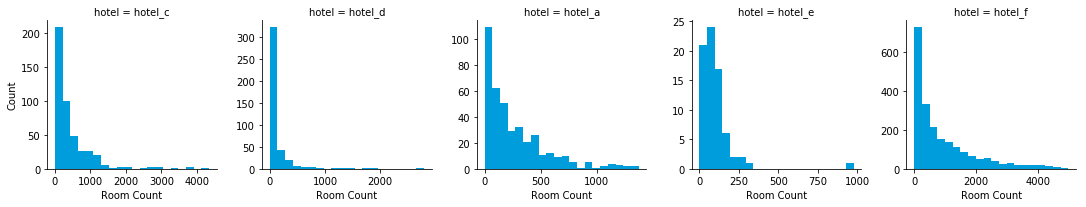

In [14]:
g = sns.FacetGrid(df, col='hotel', sharex=False, sharey=False)
g = g.map(plt.hist, 'room_night_count', bins=20, color='#009ddc').set_axis_labels("Room Count", "Count")

## Basis for Generating Notebooks

The above works in some situations. But, has some drawbacks that generating notebooks could resolve.

We will utalize the features of the nbformat package to create notebooks, edit them and save them.

In [15]:
import nbformat as nbf

- [`nbf.v4`](https://ipython.org/ipython-doc/3/api/generated/IPython.nbformat.v4.html) is the main api for the 4th version of jupyter notebooks

- `nbf.v4.new_notebook()` a function that will generate the underlying structure of a notebook. It returns a class [`nbformat.notebooknode.NotebookNode`](http://nbformat.readthedocs.io/en/latest/api.html#notebooknode-objects)

- `nbf.v4.new_markdown_cell` a function to create a markdown cell

- `nbf.v4.new_code_cell` a function to create a code cell


### Generate Plot Sequentially in Seperate Cells

The following code takes the simple plots we did above and creates a single .ipynb file with the repeated code in different cells.

In [16]:
nb = nbf.v4.new_notebook()

start = '''\
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# collect data
df = pd.read_csv('callisto_example_data.csv')'''

code_to_repeat = '''\
plt.hist(df[df.hotel == '%s'].room_night_count, bins=20, color='#009ddc')
plt.title('Historgram of Room Count')
plt.xlabel('Room Count')
plt.ylabel('Count')'''

# nb.cells is a list that we just append to to create cells
nb.cells.append(nbf.v4.new_markdown_cell('# This is a generated notebook'))
nb.cells.append(nbf.v4.new_code_cell(start))
for hotel in df.hotel.unique():
    nb.cells.append(nbf.v4.new_markdown_cell('This is for %s' % hotel))
    nb.cells.append(nbf.v4.new_code_cell(code_to_repeat % hotel))

with open('example_from_presentation.ipynb', 'wt') as f:
    nbf.write(nb, f)

['Now open'](http://localhost:8889/notebooks/example_from_presentation.ipynb)

### Generate Plot in Seperate Notebooks

Now we will instead generate individual notebook files in a folder. This is just an slight change in the arrangement of the for loop.

In [17]:
for hotel in df.hotel.unique():
    nb = nbf.v4.new_notebook()
    # nb.cells is a list that we just append to to create cells
    nb.cells.append(nbf.v4.new_markdown_cell('# This is a generated notebook'))
    nb.cells.append(nbf.v4.new_code_cell(start))
    nb.cells.append(nbf.v4.new_markdown_cell('This is for %s' % hotel))
    nb.cells.append(nbf.v4.new_code_cell(code_to_repeat % hotel))
    filename = 'individual_reports/plots_for_%s.ipynb' % hotel
    with open(filename, 'wt') as f:
        nbf.write(nb, f)


['Now open'](http://localhost:8889/notebooks/individual_reports/plots_for_hotel_a.ipynb)

## Executing the ipynb files

All we have done is save the basis of the file. None of the code has been executed at this point. The following code will execute the notebook and save it inplace. 

`jupyter nbconvert --execute --to notebook --inplace example_from_presentation.ipynb`

For the multiple files, I run the following code to generate the lines needed to run. I am sure someone here can bring up a better solution!

In [18]:
for hotel in df.hotel.unique():
    print('jupyter nbconvert --execute --to notebook --inplace ndividual_reports/plots_for_%s.ipynb' % hotel)

jupyter nbconvert --execute --to notebook --inplace ndividual_reports/plots_for_hotel_c.ipynb
jupyter nbconvert --execute --to notebook --inplace ndividual_reports/plots_for_hotel_d.ipynb
jupyter nbconvert --execute --to notebook --inplace ndividual_reports/plots_for_hotel_a.ipynb
jupyter nbconvert --execute --to notebook --inplace ndividual_reports/plots_for_hotel_e.ipynb
jupyter nbconvert --execute --to notebook --inplace ndividual_reports/plots_for_hotel_f.ipynb


# Some of the used packages
---

[nbformat](https://nbformat.readthedocs.io/en/latest/)

[nbconvert](https://nbconvert.readthedocs.io/en/latest/)

[pandas](http://pandas.pydata.org/)

[NumPy](http://www.numpy.org/)

[Matplotlib](https://matplotlib.org/)

[seaborn](https://seaborn.pydata.org/)

### How I made this presentation
[MORE IPYTHON!](http://www.damian.oquanta.info/posts/make-your-slides-with-ipython.html)

---
### For more polished documents

[knitr](https://yihui.name/knitr/) - Designed for R but can run any language

[knitpy](https://pypi.python.org/pypi/knitpy/0.1.0) - ported python version of knitr
    - Not sure what is a better choice. knitr is much much older
    - Allows the creation of Microsoft Word Documents

---
### For dashboards and interactive ploting

[Dash](https://plot.ly/products/dash/) - Think RShiny for python

[ipywidgets](https://github.com/jupyter-widgets/ipywidgets) - This can work... but most of my use cases would not allow this to work with a nbviewer only a live notebook.


# Thank You

- Project Jupyter
- Entire SciPy Foundation
- Atlanta Jupyter User Group

# Questions?

Casey Hartnett

caseyhartnett@gmail.com

https://github.com/caseyhartnett/callisto_morns_generate_ipynb

<img src="files/fish.gif">